In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scanpy as sc
import matplotlib.gridspec as gridspec
import pickle
 

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(25,25))


# Load data

In [3]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                          
                for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST


 


# Remove niche where skin folded 

In [4]:
adata_5k=adata_5k[adata_5k.obs["niche19"]!= 'Nonspecific/folded'].copy()
NICHE = "niche19"
CATEGORY="lvl5_annotation"

# Compare niches for healthy vs non-lesional

In [5]:
adata_5k_i = adata_5k[          (adata_5k.obs["Site_status"].str.startswith("Lesional"))|
                    (adata_5k.obs["disease_overall"].str.startswith("3D_Lesional_baseline"))|

                    (adata_5k.obs["Site_status"].str.startswith("Psoriasis_replicate_Lesional"))
                                          
                      ]
adata_5k_i.obs["Site_status"].value_counts()

Site_status
Lesional                        231613
Psoriasis_replicate_Lesional     60640
Name: count, dtype: int64

In [6]:
path = "/nfs/team298/ls34/niche_colors.pkl"
with open(path, "rb") as f:
    colors_new2 = pickle.load(f)



# Lesional cell contents

In [7]:
adata_5k_i = adata_5k[          (adata_5k.obs["Site_status"].str.startswith("Lesional"))|
                    (adata_5k.obs["disease_overall"].str.startswith("3D_Lesional_baseline"))|

                    (adata_5k.obs["Site_status"].str.startswith("Psoriasis_replicate_Lesional"))
                                          
                      ]


In [8]:
adata_5k_i=adata_5k_i[adata_5k_i.obs["niche19"].str.startswith("Epi")]
adata_5k_i[adata_5k_i.obs['lvl1_new']=="Myeloid"].obs["lvl5_annotation"].value_counts()

lvl5_annotation
LC                  949
cDC2: EREG+CCR7+    508
cDC2: MMP12hi       319
cDC1                172
MigDC (cDC2)        134
cDC2                115
Mast cell            36
Mac2                 32
cDC                  31
TransitionalDC        3
cDC2_cycling          3
MoDC                  2
MigDC (cDC1)          1
Mac1                  1
Name: count, dtype: int64

In [9]:
adata_5k_i = adata_5k_i[(adata_5k_i.obs["lvl5_annotation"].str.startswith("cDC"))|
(adata_5k_i.obs["lvl5_annotation"].str.startswith("Mig"))|
                        (adata_5k_i.obs["lvl5_annotation"].str.startswith("Tra"))|
                  (adata_5k_i.obs["lvl5_annotation"].str.startswith("LC"))
                      

#                (adata_5k.obs["lvl0"]=="Melanocyte")|
 #               (adata_5k.obs["lvl0"]=="Adipocyte")|
  #             (adata_5k.obs["lvl0"]=="Mast cell")|
   #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
               ]
adata_5k_i.obs.lvl5_annotation.unique()

['LC', 'cDC1', 'cDC2: EREG+CCR7+', 'cDC2', 'cDC', 'cDC2: MMP12hi', 'MigDC (cDC2)', 'TransitionalDC', 'MigDC (cDC1)', 'cDC2_cycling']
Categories (10, object): ['LC', 'MigDC (cDC1)', 'MigDC (cDC2)', 'TransitionalDC', ..., 'cDC2', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi', 'cDC2_cycling']

In [10]:
desired_order2 =  [ 'LC', 
                   'cDC2: EREG+CCR7+', 
                       'MigDC (cDC2)', 
                   'cDC2: MMP12hi',
                    'cDC2_cycling',
                   'cDC2', 
                   'cDC1', 
                   'MigDC (cDC1)',
                   'cDC', 
                   'TransitionalDC'
                   
               
                   ]
   
 

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order2:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order2,
    ordered=True
)
 
    




/tmp/ipykernel_3026452/742277652.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
/tmp/ipykernel_3026452/742277652.py:22: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
/tmp/ipykernel_3026452/742277652.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_i.obs[CATEGORY] = pd.Categorical(


In [11]:
all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())
all_cell_types
for x in sorted(adata_5k_i.obs[CATEGORY].unique().tolist()):
    if x not in desired_order2:
        print(x)

In [12]:
mpl.rcParams["axes.grid"] = False  

In [13]:
desired_order = [ 'Epidermis_APChi', 
     'EpidermisInflamm_late', 
                   'Epidermis_late', 
    'EpidermisInflamm_mid',
                   'Epidermis_mid',
        'Epidermis_basal_cycling',
    
   'Epidermis_basal',


    
#  'Papillary_dermis',
#          'Small_BV',
#                   'Tzone-like',

    
#  'Reticular_dermis', #'Reticular_dermis_LErich',
#                   'Reticular_dermis_LE_rich',


#                   'Large_BV', 'VenuleMuscle',
#                   'Perineural',
#                 #  'HF',
#                #  'OuterHF',
#     'HF_outer', 'HF_inner', #'HF_innermost',
#  'Muscle',
#  'Sebaceous_gland', 'Sebaceous_duct', 
#     'Sebaceous_immune', 
#     'Plasma_cell_rich',


   # 'Plasma_cell_niche',


#                   'Sweat_gland',
#  'Sweat_gland_channel',



# # 'Sebaceous_immune',
# # 'Epidermis_APChi',
#                                    'Hypodermis',

 #'Perifollicular_VE',
 #'Epidermis_basal_immune'
                ]


for x in adata_5k_i.obs[NICHE].unique():
    if x not in desired_order:
        print(x)
#desired_order2 = [x for x in desired_order if x in adata_5k_i.obs[NICHE] .unique()]

/tmp/ipykernel_3026452/4040554575.py:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
/tmp/ipykernel_3026452/4040554575.py:26: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()
/tmp/ipykernel_3026452/4040554575.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([NICHE, CATEGORY])


Annotations: lvl5_annotation
AD
Psoriasis


/tmp/ipykernel_3026452/4040554575.py:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
/tmp/ipykernel_3026452/4040554575.py:26: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()
/tmp/ipykernel_3026452/4040554575.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([NICHE, CATEGORY])
/tmp/ipykernel_3026452/4040554575.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


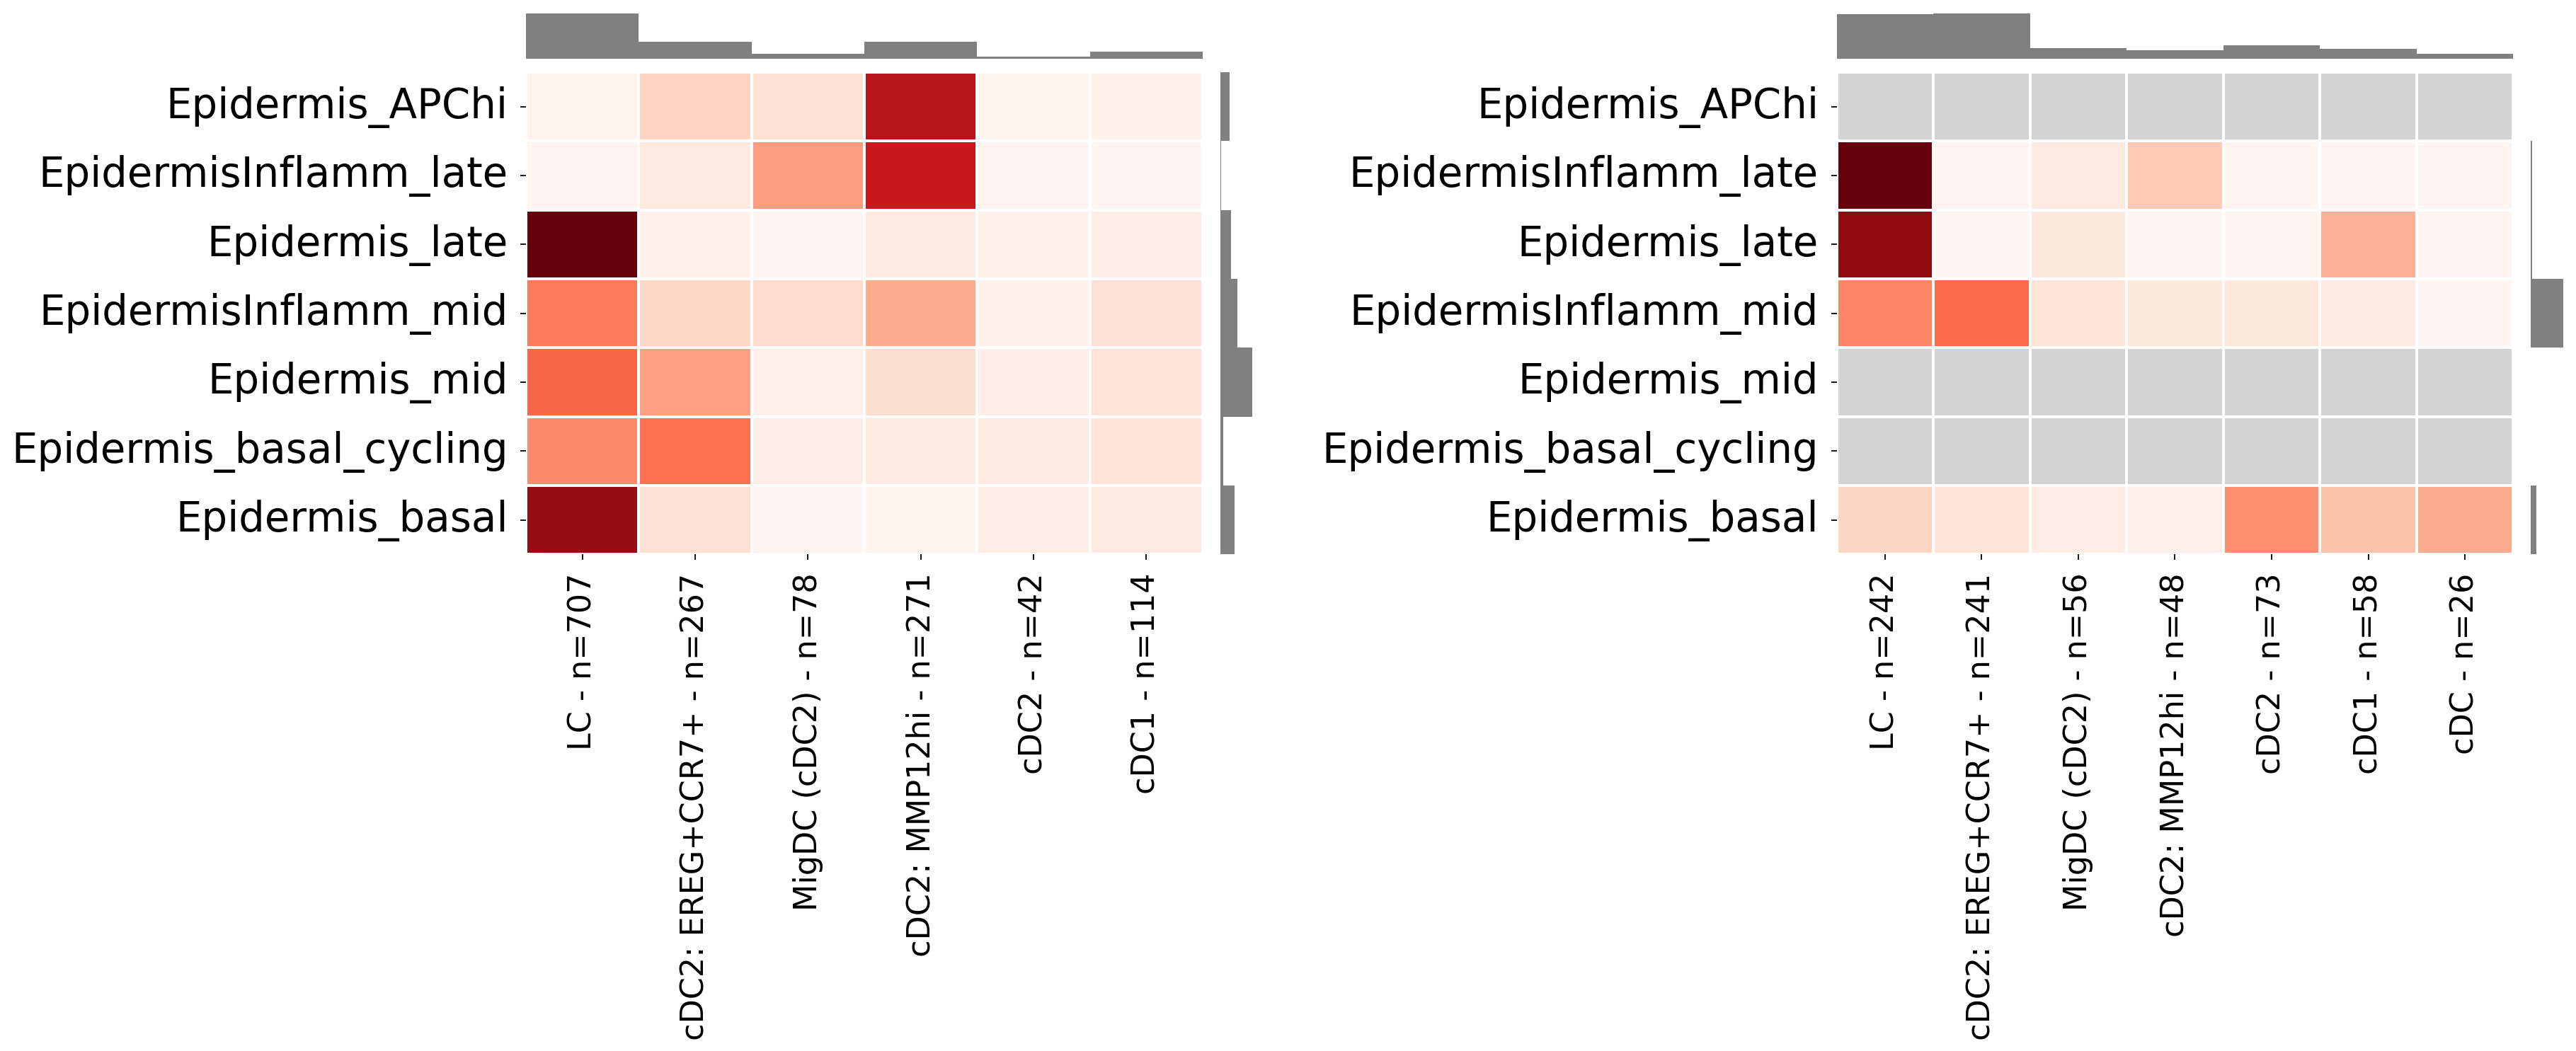

In [14]:
print("Annotations:", CATEGORY)

# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs[CATEGORY].unique().tolist())

# Colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# Figure: wider and less tall
fig = plt.figure(figsize=(20, 6))  # slightly wider
outer_gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.8)  # more space between panels

for idx, DISEASE in enumerate(["AD", "Psoriasis"]):
    print(DISEASE)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == DISEASE]
    column_counts = adata_5k_iii.obs[CATEGORY].value_counts()
    valid_cols = column_counts[column_counts >= 10].index
    adata_5k_iii = adata_5k_iii[adata_5k_iii.obs[CATEGORY].isin(valid_cols)]
    
    row_counts = adata_5k_iii.obs["niche19"].value_counts()
    valid_rows= row_counts[row_counts >= 10].index
    adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["niche19"].isin(valid_rows)]
    
    if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
        adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()

    # Pivot heatmap data
    counts = (
        adata_5k_iii.obs
        .groupby([NICHE, CATEGORY])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index=NICHE, columns=CATEGORY, values="count")
    heatmap_data = heatmap_data.reindex(index=desired_order, columns=all_cell_types).fillna(np.nan)
    heatmap_data = heatmap_data.reindex(columns=[x for x in desired_order2 if x in valid_cols])
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)  # normalize per row

    # Raw counts for bars
    col_counts = adata_5k_iii.obs[CATEGORY].value_counts().reindex(heatmap_data.columns).fillna(0)
    row_counts = adata_5k_iii.obs[NICHE].value_counts().reindex(heatmap_data.index).fillna(0)

    # Inner grid
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer_gs[idx],
        height_ratios=[0.4, 4],
        width_ratios=[4, 0.2],
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(inner_gs[0, 0])
    ax_empty  = fig.add_subplot(inner_gs[0, 1])
    ax_heat   = fig.add_subplot(inner_gs[1, 0])
    ax_rowbar = fig.add_subplot(inner_gs[1, 1])

    ax_empty.axis('off')

    # Top bar
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # Heatmap
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,
        linewidths=1
    )
    ax_heat.set_title("", fontsize=1, pad=30)
    ax_heat.set_ylabel('')
    ax_heat.set_xlabel('')

    # Set xticks with counts in labels
    xticks_labels = [f"{col} - n={int(column_counts.get(col, 0))}" for col in heatmap_data.columns]
    ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
    ax_heat.set_xticklabels(xticks_labels, rotation=90, fontsize=20)
    
    ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=26)
    ax_heat.set_facecolor('white')

    # Increase tick padding so labels don't crowd the plot
    ax_heat.tick_params(axis='x', pad=8)
    ax_heat.tick_params(axis='y', pad=8)

    # Right bar: counts per niche
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')


plt.subplots_adjust(left=0.07, right=0.97, top=0.9, bottom=0.1, wspace=0.8)
plt.tight_layout()
plt.savefig("fig3/3i_myeloidHEATMAP_sidebyside_rotated_counts.pdf", dpi=300, bbox_inches="tight")
plt.show()

Annotations: lvl5_annotation
AD


/tmp/ipykernel_3026452/3992902070.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
/tmp/ipykernel_3026452/3992902070.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()
/tmp/ipykernel_3026452/3992902070.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([NICHE, CATEGORY])


Psoriasis


/tmp/ipykernel_3026452/3992902070.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
/tmp/ipykernel_3026452/3992902070.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()
/tmp/ipykernel_3026452/3992902070.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([NICHE, CATEGORY])


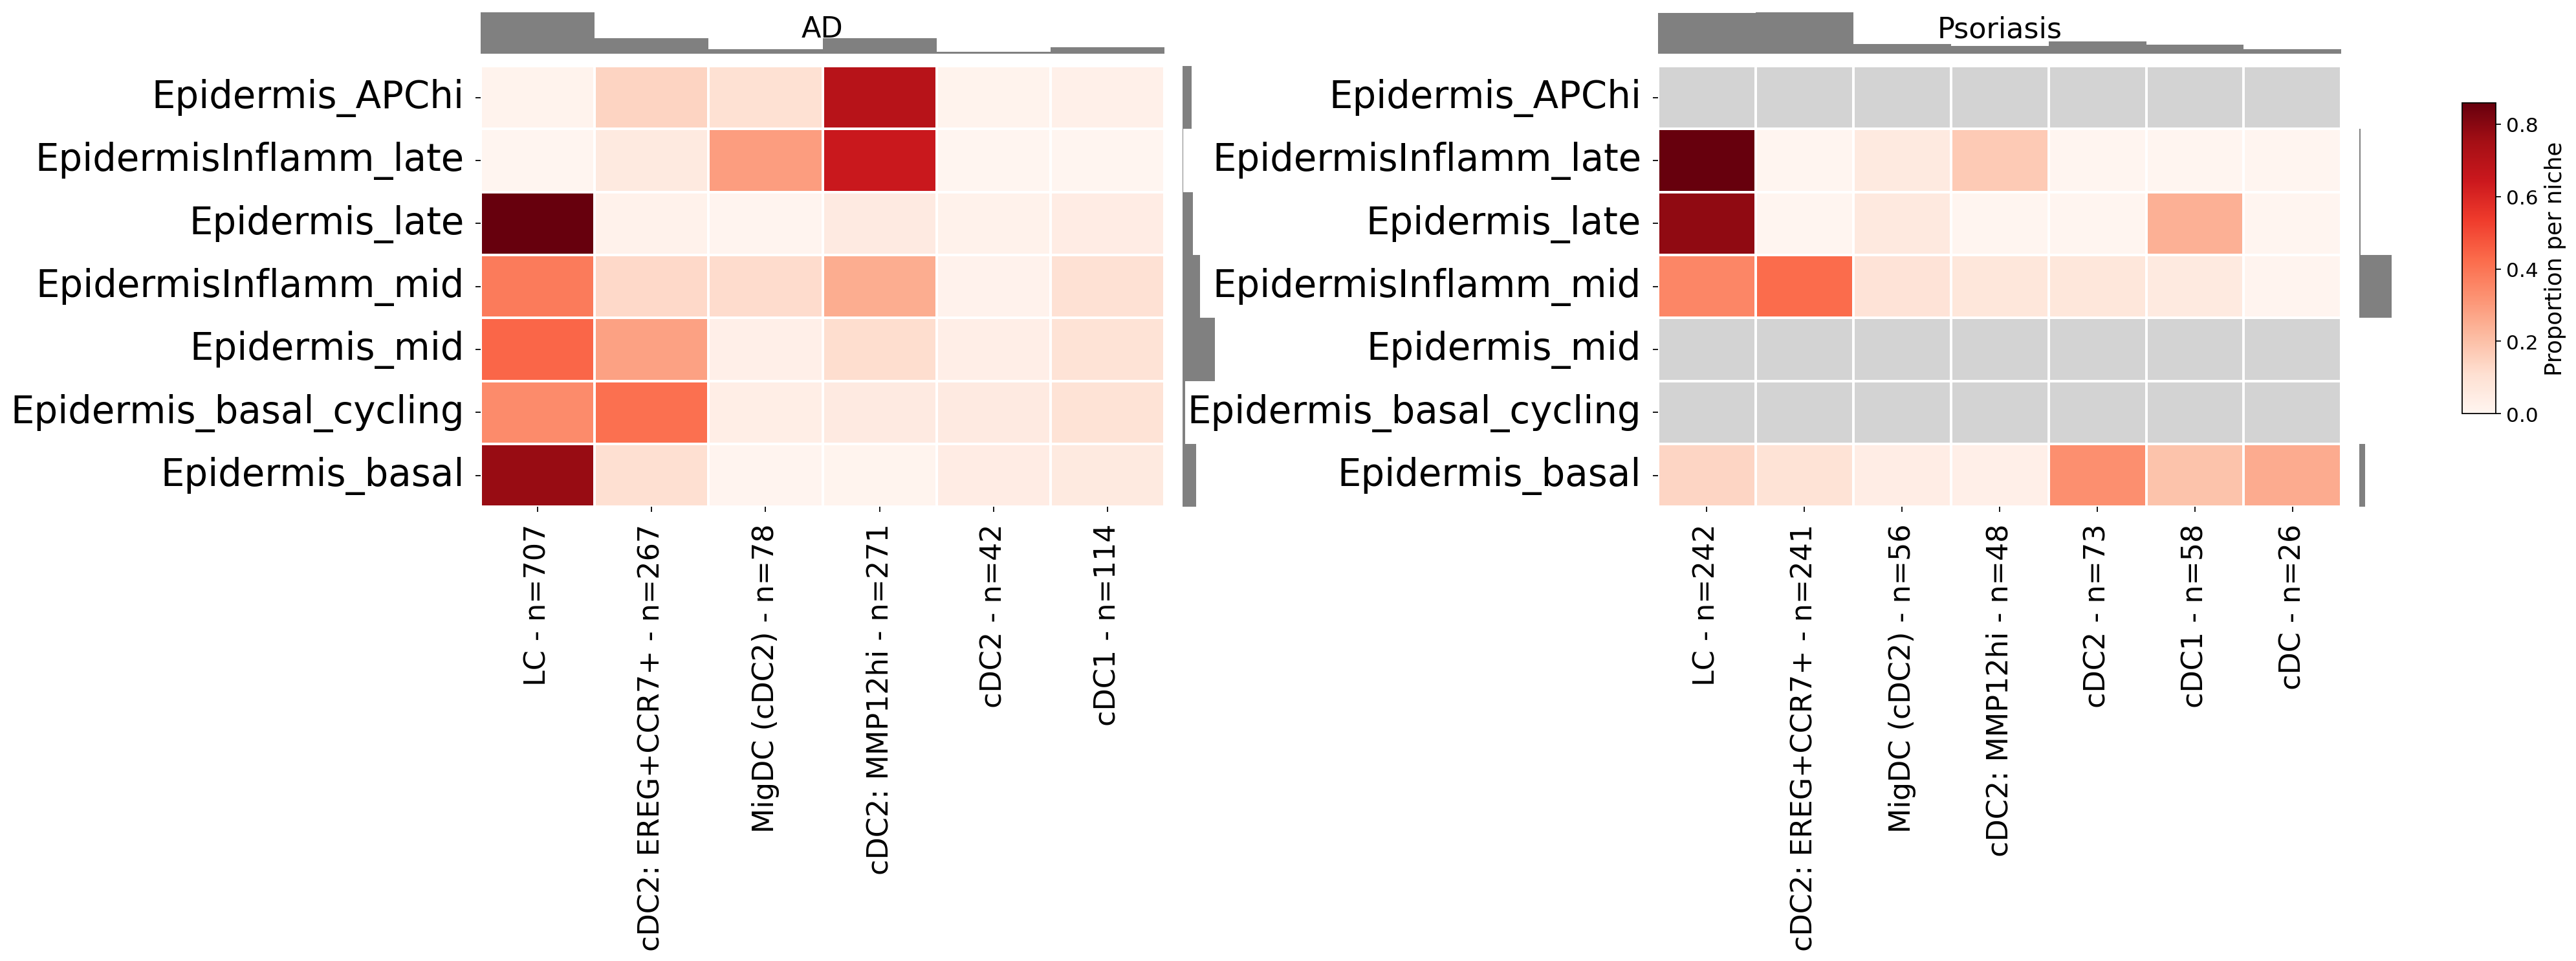

In [15]:
print("Annotations:", CATEGORY)

# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs[CATEGORY].unique().tolist())

# Colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

fig = plt.figure(figsize=(22, 6))  # a bit wider to make room for colorbar
outer_gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.6)

heatmap_artist = None  # to capture one for the colorbar later

for idx, DISEASE in enumerate(["AD", "Psoriasis"]):
    print(DISEASE)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == DISEASE]
    column_counts = adata_5k_iii.obs[CATEGORY].value_counts()

    # --- Filter ---
    valid_cols = column_counts[column_counts >= 10].index
    adata_5k_iii = adata_5k_iii[adata_5k_iii.obs[CATEGORY].isin(valid_cols)]
    row_counts = adata_5k_iii.obs["niche19"].value_counts()
    valid_rows = row_counts[row_counts >= 10].index
    adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["niche19"].isin(valid_rows)]

    if pd.api.types.is_categorical_dtype(adata_5k_iii.obs[CATEGORY]):
        adata_5k_iii.obs[CATEGORY] = adata_5k_iii.obs[CATEGORY].cat.remove_unused_categories()

    # --- Heatmap data ---
    counts = (
        adata_5k_iii.obs
        .groupby([NICHE, CATEGORY])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index=NICHE, columns=CATEGORY, values="count")
    heatmap_data = heatmap_data.reindex(index=desired_order, columns=all_cell_types).fillna(np.nan)
    heatmap_data = heatmap_data.reindex(columns=[x for x in desired_order2 if x in valid_cols])
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)  # normalize per row

    col_counts = adata_5k_iii.obs[CATEGORY].value_counts().reindex(heatmap_data.columns).fillna(0)
    row_counts = adata_5k_iii.obs[NICHE].value_counts().reindex(heatmap_data.index).fillna(0)

    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer_gs[idx],
        height_ratios=[0.4, 4],
        width_ratios=[4, 0.2],
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(inner_gs[0, 0])
    ax_empty  = fig.add_subplot(inner_gs[0, 1])
    ax_heat   = fig.add_subplot(inner_gs[1, 0])
    ax_rowbar = fig.add_subplot(inner_gs[1, 1])
    ax_empty.axis('off')

    # --- Top bar ---
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # --- Heatmap ---
    hm = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,     # suppress internal colorbar
        linewidths=1,
        vmin=0, vmax=heatmap_data.max().max()
    )
    if heatmap_artist is None:
        heatmap_artist = hm

    ax_heat.set_title(DISEASE, fontsize=20, pad=20)
    ax_heat.set_ylabel('')
    ax_heat.set_xlabel('')

    xticks_labels = [f"{col} - n={int(column_counts.get(col, 0))}" for col in heatmap_data.columns]
    ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
    ax_heat.set_xticklabels(xticks_labels, rotation=90, fontsize=20)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=26)
    ax_heat.tick_params(axis='x', pad=8)
    ax_heat.tick_params(axis='y', pad=8)

    # --- Right bar ---
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

# === Add colorbar ===
# Create a new axis specifically for the colorbar, outside main plot area
cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])  # [left, bottom, width, height]
cb = fig.colorbar(heatmap_artist.collections[0], cax=cbar_ax)
cb.set_label("Proportion per niche", fontsize=16)
cb.ax.tick_params(labelsize=14)

# === Layout adjustment ===
# Don’t use tight_layout AFTER adding the colorbar — it’ll kill it.
plt.subplots_adjust(left=0.06, right=0.9, top=0.9, bottom=0.1, wspace=0.6)

plt.savefig("fig3/3i_legend.pdf", dpi=300)
plt.show()

In [16]:
stop

NameError: name 'stop' is not defined

In [ ]:
print("Annotations: ", CATEGORY)


# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs[CATEGORY].unique().tolist())

# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in ["AD", "Psoriasis"]:
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche19", CATEGORY])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index=CATEGORY, columns="niche19", values="count")
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


    # assume heatmap_data, cmap, adata_5k_iii are defined

    # raw counts
    col_counts = (
        adata_5k_iii.obs['niche12']
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )
    row_counts = (
        adata_5k_iii.obs[CATEGORY]
        .value_counts()
        .reindex(heatmap_data.index)
        .fillna(0)
    )

    # figure + grid
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(
        2, 2,
        height_ratios=[0.2, 4],  # First value controls top bar height (was 1), make it smaller
        width_ratios=[4, 0.2],   # Second value controls right bar width (was 1), make it smaller
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_heat   = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # 1) niche12 bar (top), no text
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # 2) heatmap (no colorbar)
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,
        linewidths=1, linecolor='white'
    )
    ax_heat.set_xlabel('Niche', fontsize=14)
    ax_heat.set_ylabel('Cell type', fontsize=14)
    ax_heat.set_xticks(x+0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index))+0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)

    # 3) lvl5_annotation bar (right), no text, aligned
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

    plt.tight_layout()
    plt.show()